# このSprintについて

***Sprintの目的***

- スクラッチを通して線形回帰を理解する
- オブジェクト指向を意識した実装に慣れる
- 数式をコードに落とし込めるようにする

<br>

***どのように学ぶか***


スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。



# 線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

In [1]:
import numpy as np

In [153]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)y
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        if self.no_bias==False:
            self.coef_ = np.random.randn(X.shape[1]+1)
        else:
            self.coef_ = np.random.randn(X.shape[1])
        
        val_flag = 0
        for i in range(self.iter):
            error = self._get_error(X, y)
            self.coef_ = self._gradient_descent(X, error)
            self.loss[i] = self.objective(X, y)
            if (X_val is not None) and (y_val is not None):
                self.val_loss[i] = self.objective(X_val, y_val)
                val_flag = 1
                
            if self.verbose:
                # 学習過程を出力
                print('iter: {}, train_loss: {:e}'.format(i, self.loss[i]))
                if val_flag == 1:
                    print('iter: {}, val_loss: {:e}'.format(i, self.val_loss[i]))

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarrbay, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        return self._linear_hypothesis(X)
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
        h_theta
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        if self.no_bias == False:
            X = np.concatenate([np.ones((X.shape[0],1)), X], 1)
        
       #  print(self.coef_)
        h_theta = np.dot(X, self.coef_)        
        return h_theta

    def _get_error(self, X, y):
        """
        仮定関数と目的関数の誤差を計算する
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y: 次の形のndarray, shape (n_samples, )
          テストデータ

        Returns
        -------
        error
          次の形のndarray, shape (n_samples, 1)
          サンプル数ごと（行）ごとのエラーの計算結果
        """
        h_theta = self._linear_hypothesis(X)
        return (h_theta - y)

    def _gradient_descent(self, X, error):
        """
        サンプルと誤差により係数を計算する
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y: 次の形のndarray, shape (n_samples, )
          テストデータ

        Returns
        -------
        theta_j
          次の形のndarray, shape (1, n_features)
          特徴量（列）ごとの損失関数（二乗和誤差）の傾きの総和
        """
        
        if self.no_bias == False:
            X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
            
        theta = self.coef_ - self.lr*np.dot(error, X)/X.shape[0]
        return theta
    
    def objective(self, X, y):
        """
        損失関数モデルを定義
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y: 次の形のndarray, shape (n_samples, )
          テストデータ

        Returns
        -------
        mse: numpy.float
          平均以上誤差
        """
        
        y_pred = self._linear_hypothesis(X)
        error = (y_pred - y) ** 2
        mse = sum(error) / (2*len(y))
        return mse       

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。


$$h_θ(x) = θ_0x_0 + θ_1x_1 + ... + θ _jx_j+...+θ_nx_n(x_0=1)$$

x : 特徴量ベクトル


θ
 : パラメータベクトル


n
 : 特徴量の数


x
j
 : j番目の特徴量


θ
j
 : j番目のパラメータ（重み）


特徴量の数
n
は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。


$$h_θ(x)=θ^T⋅x$$

雛形


クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

In [98]:
    def _linear_hypothesis(X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
        h_theta
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        coef_ = np.ones(X.shape[1]+1)
        X = np.concatenate([np.ones((X.shape[0],1)), X], 1)
        h_theta = np.dot(X, coef_)        
        return h_theta

In [100]:
a = np.arange(8).reshape(4,2)
a_theta = _linear_hypothesis(a)
print('a: \n{}\n\na_theta: \n{}'.format(a, a_theta))

a: 
[[0 1]
 [2 3]
 [4 5]
 [6 7]]

a_theta: 
[ 2.  6. 10. 14.]


## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。


$$θ_j:=θ_j−α \frac{1}{m} \sum_{i=1}^{m} [(h_θ(x^{(i)})−y^{(i)})x^{(i)}_j]$$

α
 : 学習率


i
 : サンプルのインデックス


j
 : 特徴量のインデックス


雛形


ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

np.dotは引数によって挙動が変わる。

第一引数の列数と、第二の要素数があってれば下記の通り計算（最終的に、第一引数の行方向を加算して出力）。

A=⎛⎝⎜⎜123123⎞⎠⎟⎟
B=(78)

(A11B1+A12B2　A21B1+A22B2　A31B1+A32B2)


(A11B1+A12B2　A21B1+A22B2　A31B1+A32B2)

In [101]:
    def _get_error(X, y):
        """
        仮定関数と目的関数の誤差を計算する
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y: 次の形のndarray, shape (n_samples, )
          テストデータ

        Returns
        -------
        error
          次の形のndarray, shape (n_samples, 1)
          サンプル数ごと（行）ごとのエラーの計算結果
        """
        return (_linear_hypothesis(X) - y)

    def _gradient_descent( X, error):
        """
        サンプルと誤差により係数を計算する
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y: 次の形のndarray, shape (n_samples, )
          テストデータ

        Returns
        -------
        theta_j
          次の形のndarray, shape (1, n_features)
          特徴量（列）ごとの損失関数（二乗和誤差）の傾きの総和
        """
        lr = 0.1
        coef = [1,2,3]
        X = np.concatenate([np.ones((X.shape[0], 1)), X], 1)
        theta = coef - lr*np.dot(error, X)/X.shape[0]
        return theta

In [103]:
b = np.arange(4)
error = _get_error(a, b)
theta = _gradient_descent(a, error)
print('b: \n{}\n\nerror: \n{}\n\ntheta: \n{}'.format(b, error, theta))

b: 
[0 1 2 3]

error: 
[ 2.  5.  8. 11.]

theta: 
[ 0.35 -0.7  -0.35]


## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 `h_\theta(x)` の出力が推定結果です。

クラスのpredict メソッドに追加

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。


$$ L(θ) = \frac{1}{m} \sum_{i=1}^{m} [(h_θ(x^{(i)})−y^{(i)})^2$$

m: 入力されるデータの数


hθ(): 仮定関数


x(i): i番目のサンプルの特徴量ベクトル


y(i) : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

In [104]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    error = (y_pred - y) **2
    mse = sum(error) / len(y)
    return mse

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） J(θ) は次の式です。


$$J(θ) = \frac{1}{2m} \sum_{i=1}^{m} [(h_θ(x^{(i)}) − y^{(i)})^2$$

m : 入力されるデータの数


hθ() : 仮定関数


x(i) : i番目のサンプルの特徴量ベクトル


y(i) : i番目のサンプルの正解

In [105]:
    def objective(self, X, y):
        """
        損失関数モデルを定義
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y: 次の形のndarray, shape (n_samples, )
          テストデータ

        Returns
        -------
        mse: numpy.float
          平均以上誤差
        """
        
        y_pred = self._linear_hypothesis(X)
        error = (y_pred - y) ** 2
        mse = sum(error) 
        return mse

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../wk3/train.csv')
df_selected = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df_selected.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [131]:
X = np.array(df_selected[['GrLivArea', 'YearBuilt']])
y = np.array(df_selected[['SalePrice']]).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = np.log(y_train)
y_test_scaled = np.log(y_test)

In [168]:
model = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=True)
model.fit(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

iter: 0, train_loss: 6.046966e+01
iter: 0, val_loss: 6.134044e+01
iter: 1, train_loss: 5.925462e+01
iter: 1, val_loss: 6.010654e+01
iter: 2, train_loss: 5.806405e+01
iter: 2, val_loss: 5.889752e+01
iter: 3, train_loss: 5.689746e+01
iter: 3, val_loss: 5.771290e+01
iter: 4, train_loss: 5.575435e+01
iter: 4, val_loss: 5.655217e+01
iter: 5, train_loss: 5.463426e+01
iter: 5, val_loss: 5.541485e+01
iter: 6, train_loss: 5.353673e+01
iter: 6, val_loss: 5.430048e+01
iter: 7, train_loss: 5.246129e+01
iter: 7, val_loss: 5.320857e+01
iter: 8, train_loss: 5.140750e+01
iter: 8, val_loss: 5.213869e+01
iter: 9, train_loss: 5.037492e+01
iter: 9, val_loss: 5.109039e+01
iter: 10, train_loss: 4.936313e+01
iter: 10, val_loss: 5.006322e+01
iter: 11, train_loss: 4.837171e+01
iter: 11, val_loss: 4.905677e+01
iter: 12, train_loss: 4.740025e+01
iter: 12, val_loss: 4.807061e+01
iter: 13, train_loss: 4.644834e+01
iter: 13, val_loss: 4.710433e+01
iter: 14, train_loss: 4.551559e+01
iter: 14, val_loss: 4.615753e+01


iter: 263, train_loss: 3.195406e-01
iter: 263, val_loss: 3.302055e-01
iter: 264, train_loss: 3.136376e-01
iter: 264, val_loss: 3.241870e-01
iter: 265, train_loss: 3.078525e-01
iter: 265, val_loss: 3.182881e-01
iter: 266, train_loss: 3.021830e-01
iter: 266, val_loss: 3.125063e-01
iter: 267, train_loss: 2.966269e-01
iter: 267, val_loss: 3.068394e-01
iter: 268, train_loss: 2.911818e-01
iter: 268, val_loss: 3.012849e-01
iter: 269, train_loss: 2.858455e-01
iter: 269, val_loss: 2.958407e-01
iter: 270, train_loss: 2.806159e-01
iter: 270, val_loss: 2.905045e-01
iter: 271, train_loss: 2.754908e-01
iter: 271, val_loss: 2.852743e-01
iter: 272, train_loss: 2.704681e-01
iter: 272, val_loss: 2.801479e-01
iter: 273, train_loss: 2.655457e-01
iter: 273, val_loss: 2.751232e-01
iter: 274, train_loss: 2.607218e-01
iter: 274, val_loss: 2.701981e-01
iter: 275, train_loss: 2.559942e-01
iter: 275, val_loss: 2.653708e-01
iter: 276, train_loss: 2.513611e-01
iter: 276, val_loss: 2.606393e-01
iter: 277, train_los

iter: 504, train_loss: 2.626200e-02
iter: 504, val_loss: 2.752690e-02
iter: 505, train_loss: 2.621611e-02
iter: 505, val_loss: 2.747198e-02
iter: 506, train_loss: 2.617114e-02
iter: 506, val_loss: 2.741807e-02
iter: 507, train_loss: 2.612706e-02
iter: 507, val_loss: 2.736514e-02
iter: 508, train_loss: 2.608386e-02
iter: 508, val_loss: 2.731317e-02
iter: 509, train_loss: 2.604152e-02
iter: 509, val_loss: 2.726214e-02
iter: 510, train_loss: 2.600002e-02
iter: 510, val_loss: 2.721204e-02
iter: 511, train_loss: 2.595935e-02
iter: 511, val_loss: 2.716285e-02
iter: 512, train_loss: 2.591949e-02
iter: 512, val_loss: 2.711455e-02
iter: 513, train_loss: 2.588043e-02
iter: 513, val_loss: 2.706713e-02
iter: 514, train_loss: 2.584214e-02
iter: 514, val_loss: 2.702056e-02
iter: 515, train_loss: 2.580462e-02
iter: 515, val_loss: 2.697483e-02
iter: 516, train_loss: 2.576784e-02
iter: 516, val_loss: 2.692993e-02
iter: 517, train_loss: 2.573180e-02
iter: 517, val_loss: 2.688583e-02
iter: 518, train_los

iter: 769, train_loss: 2.396900e-02
iter: 769, val_loss: 2.436102e-02
iter: 770, train_loss: 2.396877e-02
iter: 770, val_loss: 2.436009e-02
iter: 771, train_loss: 2.396856e-02
iter: 771, val_loss: 2.435918e-02
iter: 772, train_loss: 2.396834e-02
iter: 772, val_loss: 2.435827e-02
iter: 773, train_loss: 2.396813e-02
iter: 773, val_loss: 2.435738e-02
iter: 774, train_loss: 2.396793e-02
iter: 774, val_loss: 2.435650e-02
iter: 775, train_loss: 2.396772e-02
iter: 775, val_loss: 2.435562e-02
iter: 776, train_loss: 2.396753e-02
iter: 776, val_loss: 2.435476e-02
iter: 777, train_loss: 2.396733e-02
iter: 777, val_loss: 2.435391e-02
iter: 778, train_loss: 2.396714e-02
iter: 778, val_loss: 2.435307e-02
iter: 779, train_loss: 2.396696e-02
iter: 779, val_loss: 2.435224e-02
iter: 780, train_loss: 2.396677e-02
iter: 780, val_loss: 2.435142e-02
iter: 781, train_loss: 2.396659e-02
iter: 781, val_loss: 2.435061e-02
iter: 782, train_loss: 2.396642e-02
iter: 782, val_loss: 2.434981e-02
iter: 783, train_los

In [169]:
y_pred = model.predict(X_test_scaled)
y_pred

array([11.79686946, 11.61214531, 12.14033374, 11.91618561, 12.21629076,
       12.21699969, 12.31390613, 11.74064353, 12.32719744, 11.44773376,
       11.79089663, 12.20650587, 12.26553784, 11.85990025, 11.64407672,
       11.71090257, 12.28535382, 12.40220356, 11.47579368, 11.53438414,
       12.25067158, 12.18207125, 12.35742658, 11.64529927, 12.21248293,
       12.63199766, 12.15297556, 12.48018549, 11.63605354, 11.90848929,
       12.07784211, 11.73954831, 12.06796379, 12.8115471 , 12.4444208 ,
       11.89438295, 11.7514812 , 11.81263141, 12.4693266 , 11.62218062,
       12.07383474, 11.79315505, 11.94287011, 11.86630604, 12.46644845,
       11.86579665, 12.31793894, 11.97131209, 12.15483492, 12.09569262,
       11.50949102, 11.44888842, 11.71246474, 12.06513663, 11.6465558 ,
       12.72035452, 11.80539781, 12.23144143, 12.40074326, 11.86659046,
       11.57878328, 11.66199089, 12.0962869 , 11.78297542, 12.24911363,
       12.40734859, 11.75472865, 12.08556388, 11.30665739, 11.76

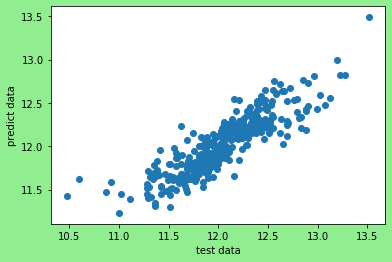

In [178]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='lightgreen')
plt.xlabel('test data')
plt.ylabel('predict data')
plt.scatter (y_test_scaled, y_pred)
plt.show()

横軸にテストデータ、縦軸にスクラッチを使用して予測したデータを取りプロット。
線形回帰しているように見える。

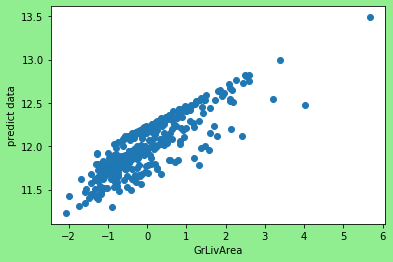

In [179]:
fig = plt.figure(facecolor='lightgreen')
plt.xlabel('GrLivArea')
plt.ylabel('predict data')
plt.scatter (X_test_scaled[:,0:1], y_pred)
plt.show()

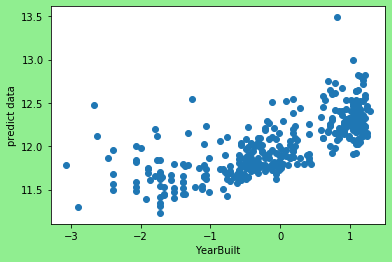

In [180]:
fig = plt.figure(facecolor='lightgreen')
plt.xlabel('YearBuilt')
plt.ylabel('predict data')
plt.scatter (X_test_scaled[:,1:2], y_pred)
plt.show()

In [143]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_pred_sk = lr.predict(X_test_scaled)

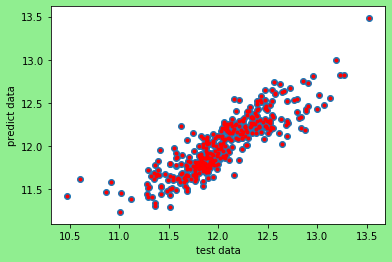

In [181]:
fig = plt.figure(facecolor='lightgreen')
plt.xlabel('test data')
plt.ylabel('predict data')
plt.scatter (y_test_scaled, y_pred)
plt.scatter (y_test_scaled, y_pred_sk, marker='.', c='r')
plt.show()

skleanの線形回帰を使用したデータ（赤）とスクラッチのデータ（青）がほとんど一致していることが確認できた。

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

plot例
![plot例](https://t.gyazo.com/teams/diveintocode/7977285221cd69d278434721fbe406e3.png 'plot例')

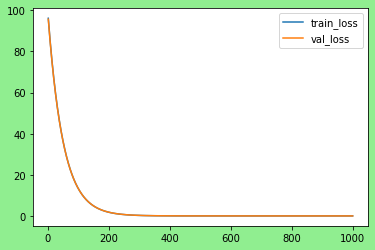

In [151]:
fig = plt.figure(facecolor='lightgreen')
x = np.arange(1,len(model.loss)+1)
plt.plot(x, model.loss, label='train_loss')
plt.plot(x, model.val_loss, label='val_loss')
plt.legend()
plt.show()

## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 
`θ0`
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [155]:
model2 = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=False)
model2.fit(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
y_pred2 = model2.predict(X_test_scaled)

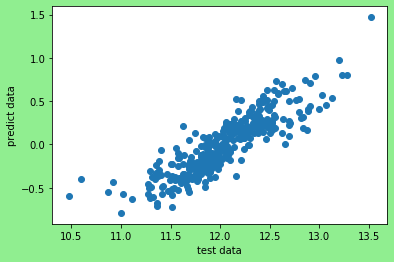

In [156]:
fig = plt.figure(facecolor='lightgreen')
plt.xlabel('test data')
plt.ylabel('predict data')
plt.scatter (y_test_scaled, y_pred2)
plt.show()

バイアスがない分、縦軸の目盛が下がった。

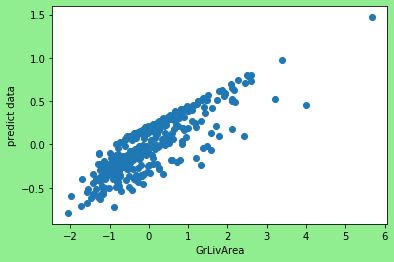

In [182]:
fig = plt.figure(facecolor='lightgreen')
plt.xlabel('GrLivArea')
plt.ylabel('predict data')
plt.scatter (X_test_scaled[:,0:1], y_pred2)
plt.show()

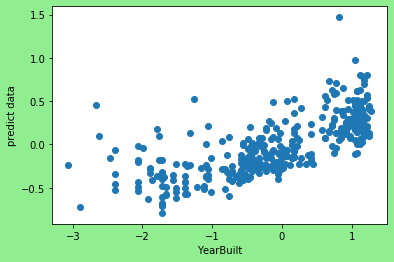

In [183]:
fig = plt.figure(facecolor='lightgreen')
plt.xlabel('YearBuilt')
plt.ylabel('predict data')
plt.scatter (X_test_scaled[:,1:2], y_pred2)
plt.show()

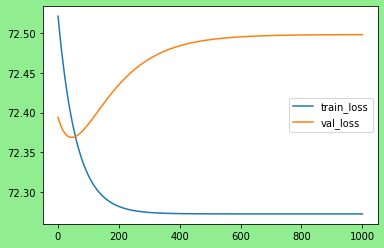

In [158]:
fig = plt.figure(facecolor='lightgreen')
x2 = np.arange(1,len(model2.loss)+1)
plt.plot(x2, model2.loss, label='train_loss')
plt.plot(x2, model2.val_loss, label='val_loss')
plt.legend()
plt.show()

訓練データに対して、損失は少ないが、検証データに対して、損失が大きく過学習気味になっていることがわかる。

今回のSalePriceのようにバイアス項は正の値しか取らない場合、バイアス項を除くと、特徴量に対する目的変数の回帰直線は、バイアス項があるときの回帰直線より、傾きが大きくなる。
従い、予測値は特徴量のサンプル数が増えるほど、どんどん正解値から上に外れていくことになるため、検証データに対する損失は、特徴量のサンプル数が多くなる程大きくなったと考える。

参考![no-bias](https://image.slidesharecdn.com/prml3-3-180812160325/95/prml-3-33-14-638.jpg?cb=1534089864)

Reference:

[PRML3章の3.3までの発表資料 - Arata Honda, Software Developer ](https://www.slideshare.net/aratahonda1/prml-3-33#:~:text=%E8%A3%9C%E8%B6%B3%20:%20%E3%83%90%E3%82%A4%E3%82%A2%E3%82%B9%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%81%AE%E5%BD%B9%E5%89%B214%20%E5%9B%B3%E3%81%AB%E3%81%99%E3%82%8B%E3%81%A8%E3%81%93%E3%82%93%E3%81%AA%E6%84%9F%E3%81%98%EF%BC%9F%20%E8%B5%A4%20:%20w_0%E3%81%8C%E3%81%82%E3%82%8B%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%20%E7%B7%91%20:%20w_0%E3%81%8C%E3%81%AA%E3%81%84%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0)